In [1]:
#data manipulation
import pandas as pd
import numpy as np
from dateutil import parser
import isodate

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt


sns.color_palette('colorblind')
%matplotlib inline

#NLP lib
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
#nltk.download('punkt')
from wordcloud import WordCloud

## Reading extracted DataFrames

In [2]:
ch_df = pd.read_csv('channel_df.csv')

In [3]:
ch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          13 non-null     int64 
 1   channel_title       13 non-null     object
 2   channel_desc        10 non-null     object
 3   channel_view        13 non-null     int64 
 4   channel_sub         13 non-null     int64 
 5   channel_video       13 non-null     int64 
 6   channel_playlistId  13 non-null     object
dtypes: int64(4), object(3)
memory usage: 856.0+ bytes


In [4]:
ch_df.head(5)

,Unnamed: 0,channel_title,channel_desc,channel_view,channel_sub,channel_video,channel_playlistId
0,0,Peak Performer,NaN,300423,1550,488,UUEaf-PDONb_nhyNRmVw9_nA
1,1,Iwona Golab,🌎Agility Worldwide Coach 🏆World Championship M...,210693,1440,251,UUxXnIktVdXrSFCE8u1D-26w
2,2,PointyFloppy,Adventure of border collies with pointy and fl...,2005,9,58,UUSPfJ89aYsRhpDSnZ0vaFCg
3,3,absoluteDogs,This is the official YouTube channel of Tom an...,1019301,47600,234,UUrz5NqpcLxpiy1Wm_ksEV3g
4,4,Zak George’s Dog Training Revolution,"This is the official YouTube channel of me, do...",272563458,3560000,546,UUZzFRKsgVMhGTxffpzgTJlQ


In [5]:
ch_df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
ch_df.head(5)

,channel_title,channel_desc,channel_view,channel_sub,channel_video,channel_playlistId
0,Peak Performer,NaN,300423,1550,488,UUEaf-PDONb_nhyNRmVw9_nA
1,Iwona Golab,🌎Agility Worldwide Coach 🏆World Championship M...,210693,1440,251,UUxXnIktVdXrSFCE8u1D-26w
2,PointyFloppy,Adventure of border collies with pointy and fl...,2005,9,58,UUSPfJ89aYsRhpDSnZ0vaFCg
3,absoluteDogs,This is the official YouTube channel of Tom an...,1019301,47600,234,UUrz5NqpcLxpiy1Wm_ksEV3g
4,Zak George’s Dog Training Revolution,"This is the official YouTube channel of me, do...",272563458,3560000,546,UUZzFRKsgVMhGTxffpzgTJlQ


In [139]:
ch_df['view_per_video'] = ch_df['channel_view'] / ch_df['channel_video']

In [143]:
ch_df.sort_values(by='view_per_video',ascending=False)

,channel_title,channel_desc,channel_view,channel_sub,channel_video,channel_playlistId,view_per_video
4,Zak George’s Dog Training Revolution,"This is the official YouTube channel of me, do...",272563458,3560000,546,UUZzFRKsgVMhGTxffpzgTJlQ,499200.472527
8,Dog Training by Kikopup,Professional dog training videos created by wo...,41563688,358000,595,UU-qnqaajTk6bfs3UZuue6IQ,69854.937815
9,Dogs That,Our DogsThat YouTube Channel is brought to you...,2128254,43700,291,UUC17PDLl8y1dP2BRV5vuseg,7313.587629
11,Tereza Králová,NaN,919462,5730,138,UUmLiE85jsHD7tSsfGUoFd1A,6662.768116
7,Jenny Damm,NaN,796472,5730,175,UUwLs3Ldbl1Ox-fvupUq7ipA,4551.268571
3,absoluteDogs,This is the official YouTube channel of Tom an...,1019301,47600,234,UUrz5NqpcLxpiy1Wm_ksEV3g,4355.987179
12,Agile Dog Training,Welcome to the Agile Dog Training channel wher...,54951,2030,13,UUxsOQBtCjUhYS-j8VYt4KFQ,4227.000000
10,Fanny Gott,Clicker training videos,1466398,7130,413,UUqw_HGVtWKcd-owWODwcQsg,3550.600484
6,OneMindDogs,OneMind Dogs is a dog and agility training met...,995572,6380,370,UUMF2E-huI3T7meqJBU-olZg,2690.735135
5,McCann Dogs Agility,"Kayl McCann is a dog trainer, who has been a m...",165365,4580,129,UUULyOKD5Y9QTKFDikg2UDgw,1281.899225


We can separate our analysis by channel type based on numbers of subscribers

__Premium tier (sub > 100,000)__ 
- Zak George's Dog Training Revolution
- Dog Training by Kikopup

__Normal tier (sub <= 100,000)__
- The rest

In [184]:
ch_df_normal = ch_df[ch_df['channel_sub'] <= 100000]

In [185]:
ch_df_premium = ch_df[ch_df['channel_sub'] > 100000]

Created channel title list (separate tier)

In [227]:
normal_ch = ch_df_normal['channel_title']

Now we can work with ch_df_normal and ch_df_premium separately

<AxesSubplot:title={'center':'Dog Training Channel Ranked by Channel Video'}, xlabel='channel_title', ylabel='channel_video'>

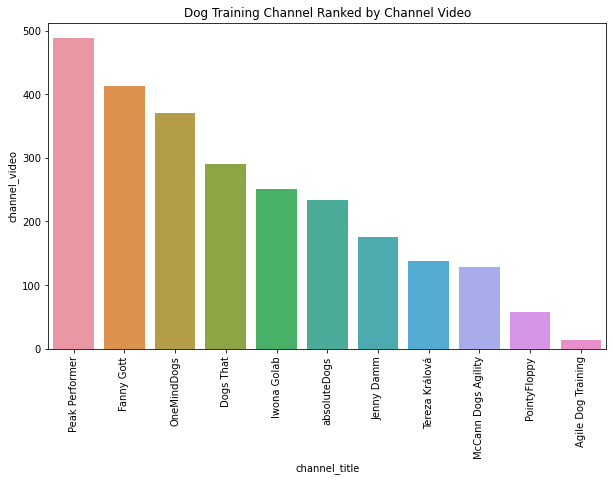

In [188]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.title('Dog Training Channel Ranked by Channel Video')
sns.barplot(x='channel_title',y='channel_video',data = ch_df_normal.sort_values('channel_video',ascending=False))

<AxesSubplot:title={'center':'Dog Training Channel Ranked by Subscribers'}, xlabel='channel_title', ylabel='channel_sub'>

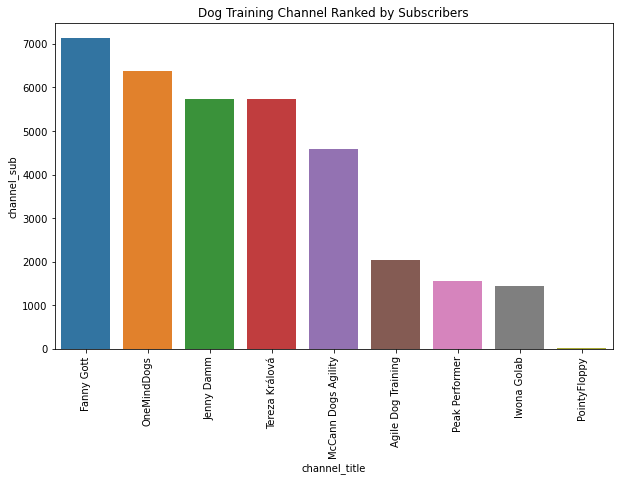

In [189]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.title('Dog Training Channel Ranked by Subscribers')
sns.barplot(x='channel_title',y='channel_sub',data = ch_df_normal.sort_values('channel_sub',ascending=False)[2::])

<AxesSubplot:title={'center':'Dog Training Channel Ranked by Subscribers'}, xlabel='channel_title', ylabel='channel_sub'>

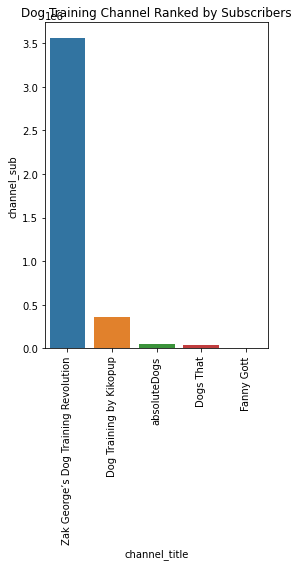

In [9]:
plt.figure(figsize=(4,6))
plt.xticks(rotation=90)
plt.title('Dog Training Channel Ranked by Subscribers')
sns.barplot(x='channel_title',y='channel_sub',data = ch_df.sort_values('channel_sub',ascending=False)[0:5])

<Figure size 720x432 with 0 Axes>

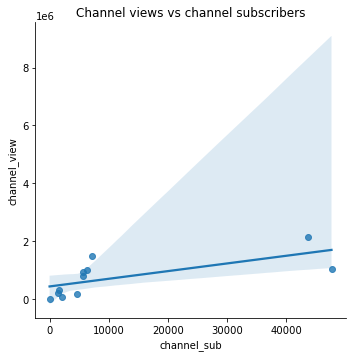

In [190]:
#excluding the top two outliers - we will investigate the channel sub vs channel views
plt.figure(figsize=(10,6))
sns.lmplot(x='channel_sub', y='channel_view', data = ch_df_normal.sort_values(by='channel_sub',ascending=True)).set(title='Channel views vs channel subscribers')

Seems like there is a correlation

## Data Preparation on video DataFrame (focusing only on normal tier for now)

In [192]:
df = pd.read_csv('video_df.csv')

In [193]:
df.shape

(3701, 13)

#### Check for empty values

In [194]:
df.isnull().sum() / len(df['video_id']) * 100

video_id          0.000000
channelTitle      0.000000
title             0.000000
description      12.348014
tags             27.100784
publishedAt       0.000000
duration          0.000000
definition        0.000000
caption           0.000000
viewCount         0.000000
likeCount         0.081059
favoriteCount     0.000000
commentCount      0.675493
dtype: float64

In [195]:
df.isnull().sum()

video_id            0
channelTitle        0
title               0
description       457
tags             1003
publishedAt         0
duration            0
definition          0
caption             0
viewCount           0
likeCount           3
favoriteCount       0
commentCount       25
dtype: int64

<AxesSubplot:>

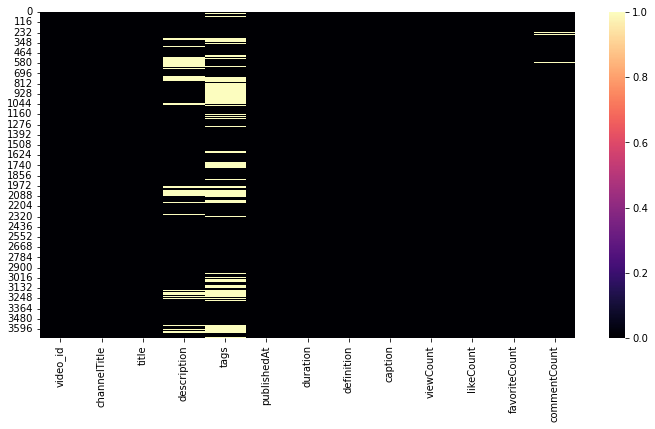

In [196]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='magma')

Since this data is acquired through API, we can fill in empty values with a specific words like "No description", "0 tags"
But let's investigate no likeCount and no commentCount - as these should be nulls too

In [197]:
df[df['likeCount'].isnull()].head(3)

,video_id,channelTitle,title,description,tags,publishedAt,duration,definition,caption,viewCount,likeCount,favoriteCount,commentCount
2613,6INllFeO19k,Dog Training by Kikopup,Dog Training seminar in Venice Italy,Visit our website: http://dogmantics.com/\nBuy...,"['dog training', 'professional dog trainer', '...",2012-05-25T17:46:14Z,PT2M33S,sd,False,6828,NaN,0,28.0
3563,MANZ9_b__g0,Tereza Králová,High´s first competition :-),NaN,NaN,2019-12-27T16:11:38Z,PT1M27S,hd,False,7171,NaN,0,3.0
3646,LEvUD2GPGYY,Tereza Králová,Flame_Czech Agility Championship 2012,Just Flame Perla z Polabí & Tereza Králová\n1s...,"['Flame', 'MČR2012']",2012-11-14T16:09:19Z,PT2M39S,sd,False,1946,NaN,0,0.0


In [198]:
df[df['commentCount'].isnull()].head(3)

,video_id,channelTitle,title,description,tags,publishedAt,duration,definition,caption,viewCount,likeCount,favoriteCount,commentCount
188,53omDafFkOA,Peak Performer,10DEZ2015 – 2on2off und Running Contacts mit R...,www.swiss-paws.com,"['swiss', 'paws', 'sheltie']",2015-12-10T15:44:00Z,PT49S,hd,False,776,3.0,0,NaN
210,OJ59U9al2Fw,Peak Performer,wand vergleich,www.swiss-paws.com,"['swiss', 'paws', 'sheltie']",2015-04-18T20:59:51Z,PT57S,hd,False,194,1.0,0,NaN
211,8rRzz6okxNQ,Peak Performer,Mein Film,www.swiss-paws.com,"['swiss', 'paws', 'sheltie']",2015-04-18T20:07:50Z,PT3M54S,hd,False,252,1.0,0,NaN


They are videos where likes and comments are turned off. So we will replace these with 0 (int) to correct data type

In [199]:
df['likeCount'].fillna(int(0),inplace=True)

In [200]:
df['commentCount'].fillna(int(0),inplace=True)

In [201]:
df.isnull().sum()

video_id            0
channelTitle        0
title               0
description       457
tags             1003
publishedAt         0
duration            0
definition          0
caption             0
viewCount           0
likeCount           0
favoriteCount       0
commentCount        0
dtype: int64

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       3701 non-null   object 
 1   channelTitle   3701 non-null   object 
 2   title          3701 non-null   object 
 3   description    3244 non-null   object 
 4   tags           2698 non-null   object 
 5   publishedAt    3701 non-null   object 
 6   duration       3701 non-null   object 
 7   definition     3701 non-null   object 
 8   caption        3701 non-null   bool   
 9   viewCount      3701 non-null   int64  
 10  likeCount      3701 non-null   float64
 11  favoriteCount  3701 non-null   int64  
 12  commentCount   3701 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 350.7+ KB


In [23]:
df.isnull().sum()

video_id            0
channelTitle        0
title               0
description       457
tags             1003
publishedAt         0
duration            0
definition          0
caption             0
viewCount           0
likeCount           0
favoriteCount       0
commentCount        0
dtype: int64

<AxesSubplot:>

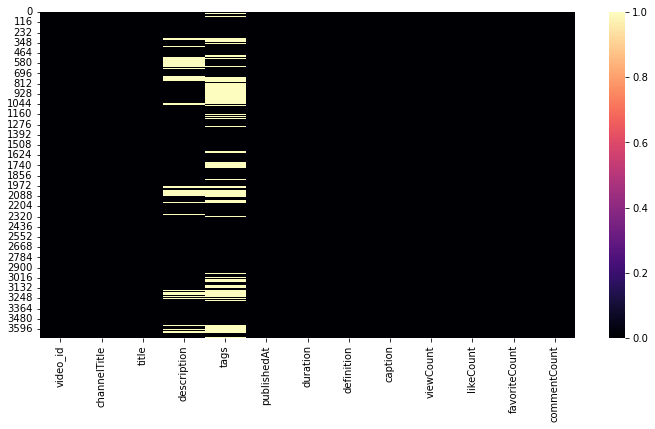

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='magma')

Check what's up with tags

In [203]:
df['tags']

0       ['swiss', 'paws', 'sheltie', 'chaim', 'raichu'...
1       ['swiss', 'paws', 'sheltie', 'chaim', 'raichu'...
2       ['swiss', 'paws', 'sheltie', 'chaim', 'raichu'...
3       ['swiss', 'paws', 'sheltie', 'chaim', 'raichu'...
4       ['swiss', 'paws', 'sheltie', 'chaim', 'raichu'...
                              ...                        
3696    ['agile dog training', 'dog agility training',...
3697    ['agile dog training', 'jess martin agility', ...
3698    ['agile dog training', 'jess martin agility', ...
3699    ['dog agility training', 'agile dog training',...
3700    ['dog agility training', 'agility start line',...
Name: tags, Length: 3701, dtype: object

In [204]:
df['description'].fillna('No Description',inplace=True)

In [205]:
df['tags'].fillna('[]',inplace=True)

<AxesSubplot:>

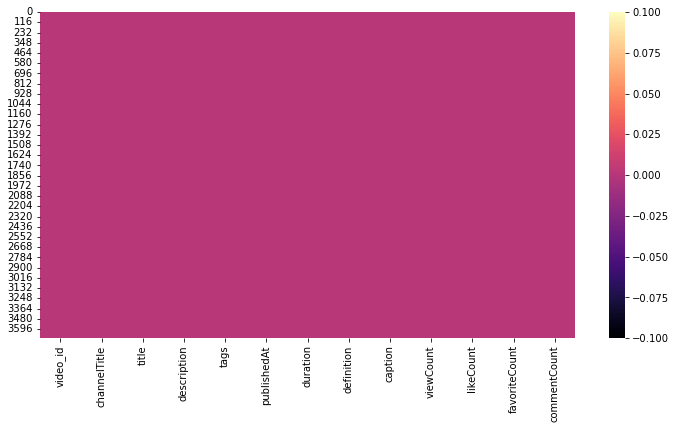

In [206]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='magma')

All data's are filled!

#### Now I need to check data types

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       3701 non-null   object 
 1   channelTitle   3701 non-null   object 
 2   title          3701 non-null   object 
 3   description    3701 non-null   object 
 4   tags           3701 non-null   object 
 5   publishedAt    3701 non-null   object 
 6   duration       3701 non-null   object 
 7   definition     3701 non-null   object 
 8   caption        3701 non-null   bool   
 9   viewCount      3701 non-null   int64  
 10  likeCount      3701 non-null   float64
 11  favoriteCount  3701 non-null   int64  
 12  commentCount   3701 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 350.7+ KB


tags should be counted, publishedAt should be date, duration should be time, likeCount and commentCount should be int.

In [208]:
#converting columns to numerical values
num_cols = ['viewCount', 'likeCount', 'favoriteCount','commentCount']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       3701 non-null   object 
 1   channelTitle   3701 non-null   object 
 2   title          3701 non-null   object 
 3   description    3701 non-null   object 
 4   tags           3701 non-null   object 
 5   publishedAt    3701 non-null   object 
 6   duration       3701 non-null   object 
 7   definition     3701 non-null   object 
 8   caption        3701 non-null   bool   
 9   viewCount      3701 non-null   int64  
 10  likeCount      3701 non-null   float64
 11  favoriteCount  3701 non-null   int64  
 12  commentCount   3701 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 350.7+ KB


#### Feature Engineering

In [210]:
df['publishedAt'].head(5)

0    2022-07-28T11:26:27Z
1    2022-07-04T05:33:31Z
2    2022-07-01T17:23:48Z
3    2022-07-01T17:22:30Z
4    2022-07-01T16:21:41Z
Name: publishedAt, dtype: object

In [211]:
df['publishedAt'] =  df['publishedAt'].apply(lambda x: parser.parse(x)) 
df['publishedDay'] = df['publishedAt'].apply(lambda x: x.strftime("%A"))
df['publishedMonth'] = df['publishedAt'].apply(lambda x: x.strftime("%m"))

Note: Datetime should be posted depending on their own timezones

In [212]:
#change format of duration column
df['duration_sec'] = df['duration'].apply(lambda x : isodate.parse_duration(x))
df['duration_sec'] = df['duration_sec'].astype('timedelta64[s]')

In [213]:
df['duration_min'] = df['duration_sec'].apply(lambda x : round(x/60))

In [214]:
df.head(5)

,video_id,channelTitle,title,description,tags,publishedAt,duration,definition,caption,viewCount,likeCount,favoriteCount,commentCount,publishedDay,publishedMonth,duration_sec,duration_min
0,kBHds-isexQ,Peak Performer,07/2022 – Training with Peak on 50 cm (Interme...,No Description,"['swiss', 'paws', 'sheltie', 'chaim', 'raichu'...",2022-07-28 11:26:27+00:00,PT2M30S,hd,False,595,16.0,0,0.0,Thursday,07,150.0,2
1,x-0xqKDfgdg,Peak Performer,MAY2022 – World Agility Open (WAO) – Nadine Al...,www.peak-performer.com,"['swiss', 'paws', 'sheltie', 'chaim', 'raichu'...",2022-07-04 05:33:31+00:00,PT3M47S,hd,False,346,13.0,0,0.0,Monday,07,227.0,4
2,Ousj-3KKYm0,Peak Performer,Steppach 06/2022 | Nadine Alshut & Nuii,www.peak-performer.com,"['swiss', 'paws', 'sheltie', 'chaim', 'raichu'...",2022-07-01 17:23:48+00:00,PT2M27S,hd,False,433,6.0,0,0.0,Friday,07,147.0,2
3,xs3UXvPFiMs,Peak Performer,Steppach 06/2022 | Nadine Alshut & Pashion,www.peak-performer.com,"['swiss', 'paws', 'sheltie', 'chaim', 'raichu'...",2022-07-01 17:22:30+00:00,PT2M23S,hd,False,292,11.0,0,0.0,Friday,07,143.0,2
4,Q7nnSj5Ied8,Peak Performer,Steppach 06/2022 | Nadine Alshut & Cinna,www.peak-performer.com,"['swiss', 'paws', 'sheltie', 'chaim', 'raichu'...",2022-07-01 16:21:41+00:00,PT3M18S,hd,False,334,12.0,0,2.0,Friday,07,198.0,3


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype                  
---  ------          --------------  -----                  
 0   video_id        3701 non-null   object                 
 1   channelTitle    3701 non-null   object                 
 2   title           3701 non-null   object                 
 3   description     3701 non-null   object                 
 4   tags            3701 non-null   object                 
 5   publishedAt     3701 non-null   datetime64[ns, tzutc()]
 6   duration        3701 non-null   object                 
 7   definition      3701 non-null   object                 
 8   caption         3701 non-null   bool                   
 9   viewCount       3701 non-null   int64                  
 10  likeCount       3701 non-null   float64                
 11  favoriteCount   3701 non-null   int64                  
 12  commentCount    3701 non-null   fl

In [232]:
df['tags_length'] = df['tags'].apply(lambda x : len(x))

In [234]:
df['tags_list'] = df['tags'].apply(lambda x : x.strip("[]").replace("'","").split(', '))

In [235]:
df['tags_count'] = df['tags_list'].apply(lambda x : len(x))

Separate video data into different tiers

In [237]:
df_normal = df[df['channelTitle'].isin(normal_ch)].drop('favoriteCount',axis=1)

In [238]:
df_premium = df[~df['channelTitle'].isin(normal_ch)].drop('favoriteCount',axis=1)

[Text(0.5, 1.0, 'Normal Channel Feature Correlation')]

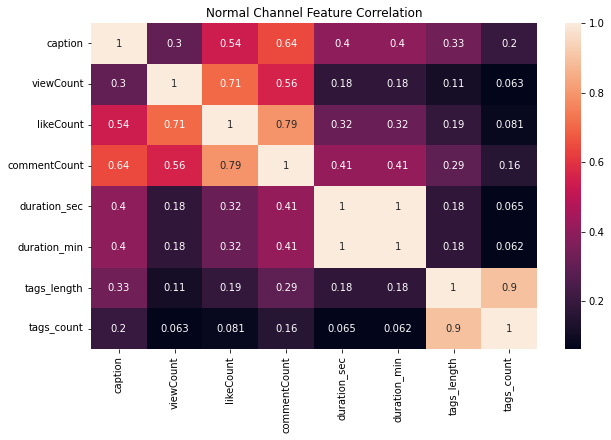

In [246]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df_normal.corr(),annot=True).set(title='Normal Channel Feature Correlation')

[Text(0.5, 1.0, 'Premium Channel Feature Correlation')]

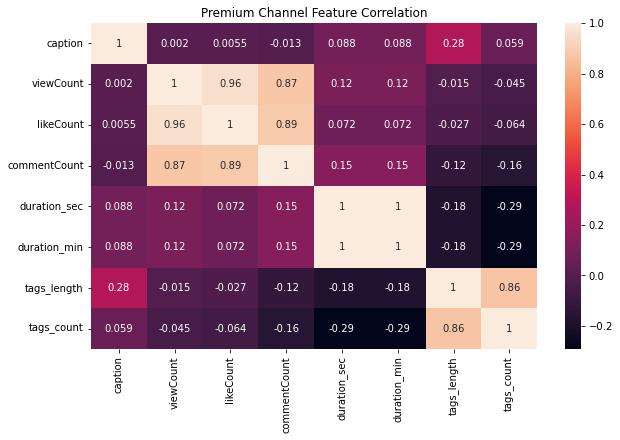

In [245]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df_premium.corr(),annot=True).set(title='Premium Channel Feature Correlation')

Check average tags per video per channel

In [135]:
tags.groupby(by='channelTitle').mean()['tags_count'].sort_values(ascending=False)

channelTitle
Dog Training by Kikopup                 25.008403
Dogs That                               11.838488
Zak George’s Dog Training Revolution    10.758684
Agile Dog Training                       8.076923
McCann Dogs Agility                      7.705426
Peak Performer                           7.651639
Fanny Gott                               6.762712
Jenny Damm                               5.331429
OneMindDogs                              4.881081
Iwona Golab                              3.657371
Tereza Králová                           1.313869
absoluteDogs                             1.162393
PointyFloppy                             1.000000
Name: tags_count, dtype: float64

<AxesSubplot:xlabel='channelTitle'>

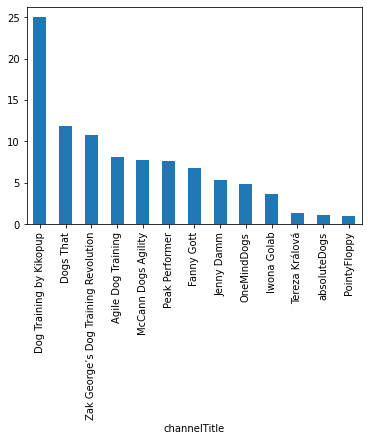

In [132]:
tags.groupby(by='channelTitle').mean()['tags_count'].sort_values(ascending=False).plot(kind='bar')

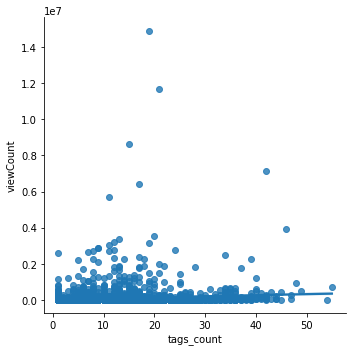

In [114]:
sns.lmplot(x='tags_count',y='viewCount',data=tags)

In [138]:
#feature engineering
#no. of likes and comments per views (1000) maybe
#title character length
#popular words in title characters

need to change to proper duration time

#### Sample plots

Investigate relationship between title length and view counts

<Figure size 864x432 with 0 Axes>

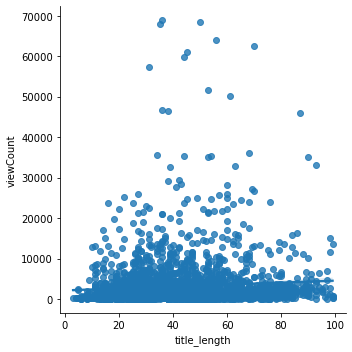

In [248]:
#title length vs view
df_normal['title_length'] = df_normal['title'].apply(lambda x: len(x)) #move to feature engineering part

plt.figure(figsize=(12,6))
sns.lmplot(x='title_length',y='viewCount',data=df_normal)

comment count vs view count

<Figure size 864x432 with 0 Axes>

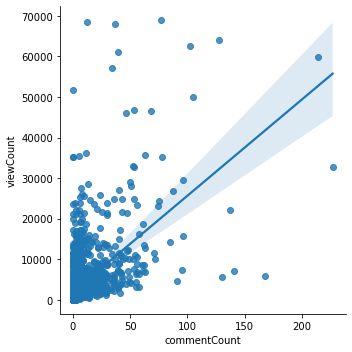

In [249]:
plt.figure(figsize=(12,6))
sns.lmplot(x='commentCount',y='viewCount',data=df_normal)

observation: seems like there is a trend between view and comment - possibly due to youtube algorithm

<Figure size 864x432 with 0 Axes>

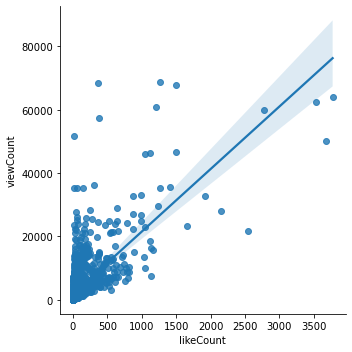

In [250]:
plt.figure(figsize=(12,6))
sns.lmplot(x='likeCount',y='viewCount',data=df_normal)

Investigating differences in published time, but has to be based on channel location - in reality should check subscribers location as well to match that

In [251]:
my_channel = df_normal[df_normal['channelTitle'] == 'PointyFloppy']

<AxesSubplot:xlabel='published_hr', ylabel='Count'>

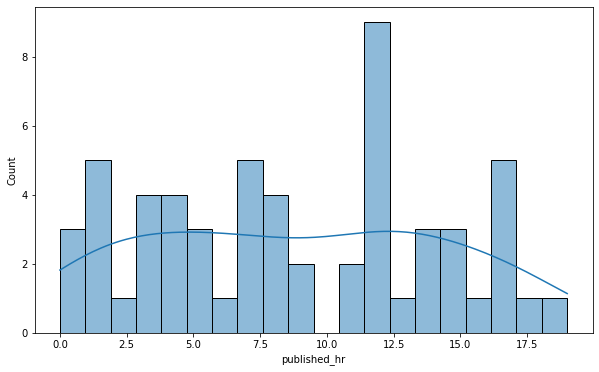

In [253]:
plt.figure(figsize=(10,6))
sns.histplot(data=my_channel, x="published_hr",bins=20,kde=True)

<Figure size 864x432 with 0 Axes>

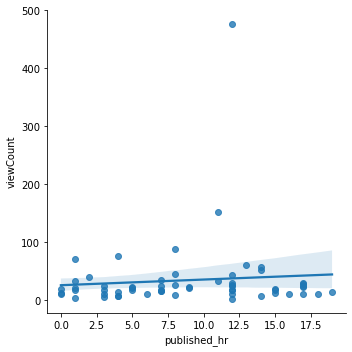

In [254]:
plt.figure(figsize=(12,6))
sns.lmplot(x='published_hr',y='viewCount',data=my_channel)

May not be clear but we can explore other timezones - or match with other thai dog channels to see if uploading in the evening will get more views

#### Go back all data

In [256]:
#EDA part
#view distribution in each channel
#viewcount vs comment/like
#view to comment ratio or view to like ratio
#video duration matter?
#title length matter?
#wordcloud for title
#worldcloud for comment
#no. of tags - popular tags?
#days in week - note the timezone
#month ?

#things to note
#add more local channels
#positive comments? correlation of comments and title to say which topic is in demand

#can I create a video title suggestion model ?